In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print( y_train.shape)
print(x_test.shape)
y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

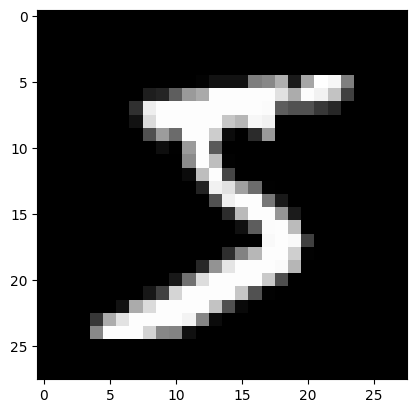

In [25]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [29]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [38]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
training=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=25, batch_size=32)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8160 - loss: 6.9385 - val_accuracy: 0.8734 - val_loss: 0.5004
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9031 - loss: 0.4139 - val_accuracy: 0.9120 - val_loss: 0.3505
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9250 - loss: 0.3000 - val_accuracy: 0.9309 - val_loss: 0.3229
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9380 - loss: 0.2359 - val_accuracy: 0.9392 - val_loss: 0.2884
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9432 - loss: 0.2207 - val_accuracy: 0.9306 - val_loss: 0.3211
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9473 - loss: 0.2001 - val_accuracy: 0.9351 - val_loss: 0.2780
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9512 - loss: 0.1908 - val_accuracy: 0.9412 - val_loss: 0.2943
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9512 - loss: 0.1954 

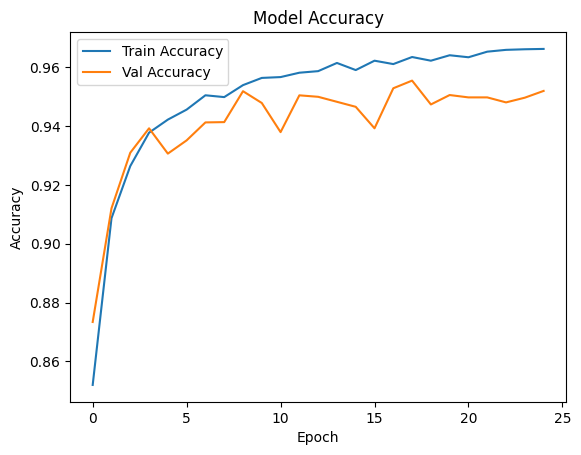

In [41]:
plt.plot(training.history['accuracy'], label='Train Accuracy')
plt.plot(training.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()